# Differences in FYs between the JEFF-3.3 and the JEFF-3.1.1 evaluations 

Import sandy and other useful packages.

In [1]:
import urllib

In [2]:
import sandy

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

### Load FYs from website

For both evaluations we select the cumulative fission yields for a thermal fission in $^{235}$U.

In [4]:
def read_fy(url):
    with urllib.request.urlopen(url) as f:
        text_fy = f.read().decode('utf-8')
    tape = sandy.Endf6.from_text(text_fy)
    return sandy.Fy.from_endf6(tape).filter_by("MT", 459).filter_by("ZAM", 922350).filter_by("E", 0.0253)

In [5]:
url = "https://www.oecd-nea.org/dbdata/jeff/jeff33/downloads/JEFF33-nfy.asc"
jeff33 = read_fy(url)

In [6]:
url = "https://www.oecd-nea.org/dbforms/data/eva/evatapes/jeff_31/JEFF311/JEFF-311FY/JEFF311NFY.ASC"
jeff311 = read_fy(url).filter_by("MT", 459).filter_by("ZAM", 922350).filter_by("E", 0.0253)

Merge the two evaluations in one single database.

In [7]:
df = jeff311.data[["ZAP", "FY"]].merge(
    jeff33.data[["ZAP", "FY"]], on="ZAP", suffixes=("_JEFF311", "_JEFF33")
)

Calculate the ratio between JEFF-3.3 and JEFF-3.1.1.

In [8]:
df["ratio"] = (df["FY_JEFF33"] / df["FY_JEFF311"] - 1) * 100
df["absratio"] = df["ratio"].abs()

### Plot ratio for largest fission yields

In [9]:
absratio_limit = 0.9
fy_limit = 3 / 100

diff = df.query(f"absratio > {absratio_limit} & FY_JEFF33 > {fy_limit}")\
         .sort_values(by="ZAP", ascending=True, ignore_index=True)

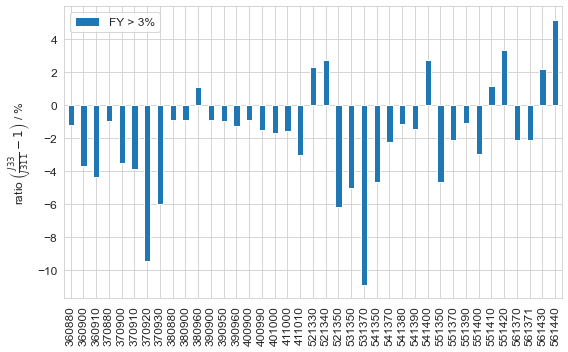

In [10]:
fig, ax = plt.subplots(figsize=(8, 5))
diff.plot(kind="bar", x="ZAP", y="ratio", ax=ax, label="FY > 3%")

ax.set_ylabel("ratio $\\left(\\frac{J33}{J311} - 1\\right)$ / %", fontsize="large")
ax.set_xlabel(None)
ax.tick_params(axis='both', which='major', labelsize="large")
ax.legend(prop={"size": "large"})

plt.tight_layout();

### Plot ratios for Nd isotopes

In [11]:
diff = df.query("ZAP < 601520 & ZAP > 600000")

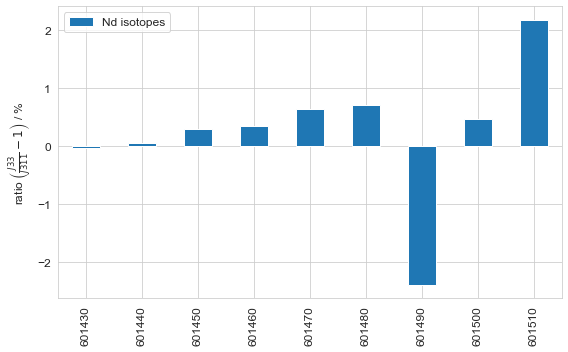

In [12]:
fig, ax = plt.subplots(figsize=(8, 5))
diff.plot(kind="bar", x="ZAP", y="ratio", ax=ax, label="Nd isotopes")

ax.set_ylabel("ratio $\\left(\\frac{J33}{J311} - 1\\right)$ / %", fontsize="large")
ax.set_xlabel(None)
ax.tick_params(axis='both', which='major', labelsize="large")
ax.legend(prop={"size": "large"})

plt.tight_layout();

### Plot ratios for Cs isotopes

In [13]:
diff = df[df.ZAP.isin([551330, 551350, 551370])]

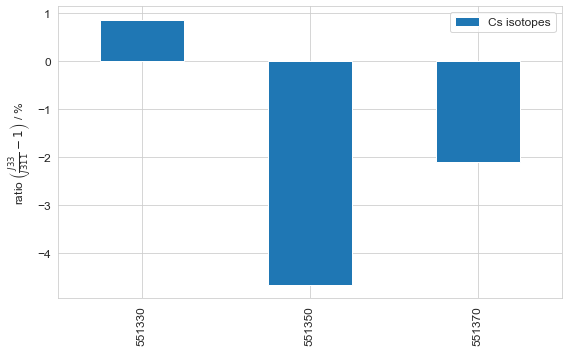

In [14]:
fig, ax = plt.subplots(figsize=(8, 5))
diff.plot(kind="bar", x="ZAP", y="ratio", ax=ax, label="Cs isotopes")

ax.set_ylabel("ratio $\\left(\\frac{J33}{J311} - 1\\right)$ / %", fontsize="large")
ax.set_xlabel(None)
ax.tick_params(axis='both', which='major', labelsize="large")
ax.legend(prop={"size": "large"})

plt.tight_layout();